In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/fraud.csv")
df.head()

,amount,hour,is_international,merchant_risk,txn_last_24h,distance_km,fraud
0,2971.18,2,0,0.29,1,60.89,0
1,1574.57,0,0,0.64,1,321.67,1
2,3455.38,20,0,0.49,3,49.54,0
3,8291.86,15,1,0.38,10,976.06,1
4,1430.60,22,0,0.19,2,475.88,0


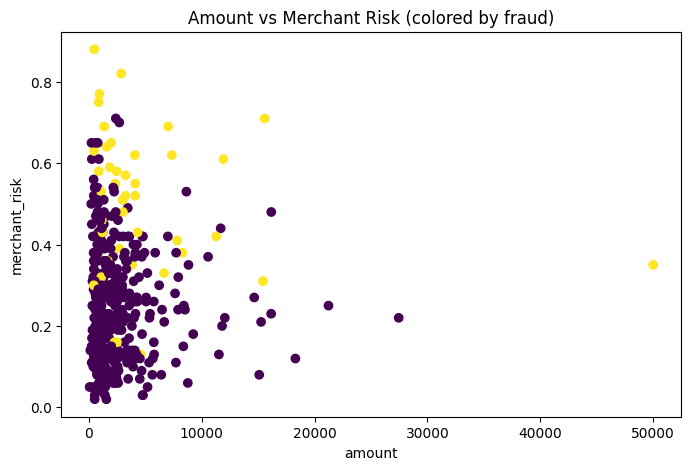

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(df["amount"], df["merchant_risk"], c=df["fraud"])
plt.xlabel("amount")
plt.ylabel("merchant_risk")
plt.title("Amount vs Merchant Risk (colored by fraud)")
plt.show()

In [ ]:
x = df.iloc[:, 0 : 6]
y = df.iloc[:, -1]

In [ ]:
x

,amount,hour,is_international,merchant_risk,txn_last_24h,distance_km
0,2971.18,2,0,0.29,1,60.89
1,1574.57,0,0,0.64,1,321.67
2,3455.38,20,0,0.49,3,49.54
3,8291.86,15,1,0.38,10,976.06
4,1430.60,22,0,0.19,2,475.88
...,...,...,...,...,...,...
395,1130.96,9,0,0.44,6,145.02
396,325.99,7,0,0.19,2,1.74
397,7001.45,5,0,0.42,2,6.09
398,1612.37,5,0,0.14,2,109.76


In [ ]:
y

,fraud
0,0
1,1
2,0
3,1
4,0
...,...
395,0
396,0
397,0
398,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2)

In [ ]:
print("For Training")
print("For Training - x")
print(x_train)

print("For Training - y")
print(y_train)

print("For Testing")
print("For Testing - x")
print(x_test)

print("For Testing - y")
print(y_test)

For Training
For Training - x
      amount  hour  is_international  merchant_risk  txn_last_24h  distance_km
313  4078.60     4                 0           0.37             3        19.42
120  3987.95     4                 0           0.22             0        30.29
294  2583.80    13                 0           0.28             2        69.90
44    412.19     4                 1           0.11             3       189.70
190  1156.88    14                 1           0.46             2       751.78
..       ...   ...               ...            ...           ...          ...
341  2306.96    18                 0           0.09             3         3.00
228   884.21    19                 1           0.58             6        39.69
90   1992.36    10                 0           0.27             3       116.50
53   3333.16     1                 0           0.12             3        40.10
2    3455.38    20                 0           0.49             3        49.54

[320 rows x 6 columns

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)
x_train


array([[ 0.2484264 , -0.98437556, -0.48038446,  0.52831416,  0.06261775,
        -0.71402261],
       [ 0.22743633, -0.98437556, -0.48038446, -0.42181996, -1.40355406,
        -0.66596858],
       [-0.09769553,  0.27450615, -0.48038446, -0.04176631, -0.42610618,
        -0.49086093],
       ...,
       [-0.23464385, -0.14512109, -0.48038446, -0.10510859,  0.06261775,
        -0.28485193],
       [ 0.07581927, -1.40400279, -0.48038446, -1.05524271,  0.06261775,
        -0.62260059],
       [ 0.1041194 ,  1.25363636, -0.48038446,  1.28842146,  0.06261775,
        -0.58086829]])

In [ ]:
x_test = scaler.transform(x_test)
x_test

array([[ 2.99080425e-01,  1.34630405e-01, -4.80384461e-01,
        -1.68450862e-01, -9.14830124e-01, -5.75607548e-01],
       [ 9.29057999e-01, -1.40400279e+00, -4.80384461e-01,
         2.55526695e+00, -4.26106185e-01, -6.06243650e-01],
       [-4.66074112e-01, -9.84375555e-01, -4.80384461e-01,
        -4.21819961e-01,  6.26177547e-02, -3.85601822e-01],
       [-1.92429853e-01,  4.14381895e-01, -4.80384461e-01,
        -9.91900434e-01, -4.26106185e-01, -6.61636199e-01],
       [ 5.47907083e-01,  1.67326360e+00, -4.80384461e-01,
        -4.21819961e-01,  6.26177547e-02, -2.30741408e-01],
       [ 1.24274200e+00,  1.53338785e+00, -4.80384461e-01,
        -8.65215884e-01, -9.14830124e-01, -2.42765968e-01],
       [-6.03939377e-01, -1.40400279e+00,  2.08166600e+00,
         2.11602787e-01,  1.52878957e+00,  2.92406981e+00],
       [-4.91042220e-01, -7.04624065e-01, -4.80384461e-01,
         6.54998710e-01, -9.14830124e-01, -7.96249376e-01],
       [-5.45671968e-01, -1.45121085e-01, -4.803

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [ ]:
clf.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_predict = clf.predict(x_test)
y_predict


array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.9

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[68  5]
 [ 3  4]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        73
           1       0.44      0.57      0.50         7

    accuracy                           0.90        80
   macro avg       0.70      0.75      0.72        80
weighted avg       0.91      0.90      0.91        80

